In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
%matplotlib nbagg
sp.init_printing()

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Prostý nosník zatížený momentem v místě levé podpory

<IPython.core.display.Javascript object>


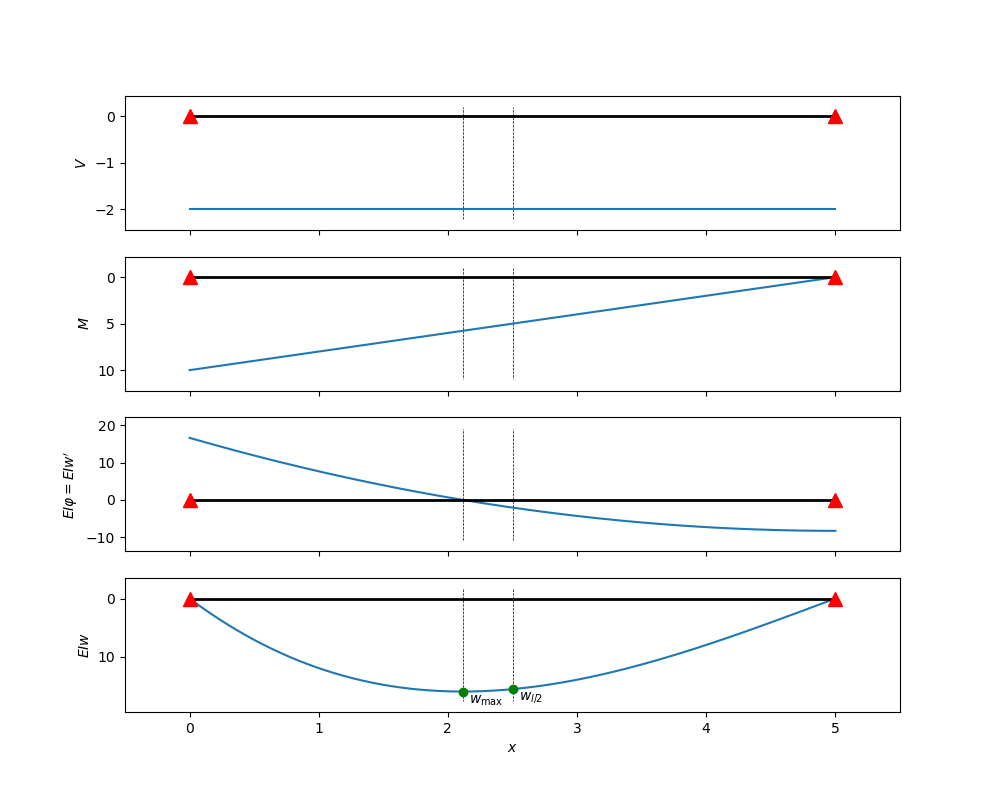

In [4]:
Ma = 10
l = 5
V = lambda x: -Ma/l * np.ones_like(x)
M = lambda x: Ma * (1-x/l)
phi = lambda x: Ma/(6*l)* (3*x**2 - 6*l*x + 2*l**2)
w = lambda x: Ma/(6*l)* (x**3 - 3*l*x**2 + 2*l**2*x)
xmax = l * (1-np.sqrt(3)/3)
wmax = w(xmax)

x = np.linspace(0, l, 1000)
fix, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))
ax[0].plot(x, V(x))
ax[0].plot([0, l], [0,0], 'k-', lw=2)
ax[0].plot([0,l], [0,0], 'r^', ms=10)
ax[0].set_ylabel('$V$')

ax[1].plot(x, M(x))
ax[1].plot([0, l], [0,0], 'k-', lw=2)
ax[1].plot([0,l], [0,0], 'r^', ms=10)
ax[1].set_ylabel('$M$')

ax[2].plot(x, phi(x))
ax[2].plot([0, l], [0,0], 'k-', lw=2)
ax[2].plot([0,l], [0,0], 'r^', ms=10)
ax[2].set_ylabel(r"$EI\varphi = EIw'$")

ax[3].plot(x, w(x))
ax[3].plot([0, l], [0,0], 'k-', lw=2)
ax[3].plot([0,l], [0,0], 'r^', ms=10)
ax[3].plot([xmax, l/2], [wmax, w(l/2)], 'go')
ax[3].set_ylabel('$EIw$')
ax[3].set_xlabel('$x$')
ax[3].text(xmax+.05, wmax+2, '$w_{\mathrm{max}}$')
ax[3].text(l/2+.05, w(l/2)+2, '$w_{l/2}$')

for a in ax:
    a.set_xlim(-.5, l+0.5)
    a.margins(.1)
    ymin, ymax = a.get_ylim()
    a.plot([xmax]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([l/2]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)

ax[1].invert_yaxis()
ax[3].invert_yaxis()

# Clebschova metoda

Příklad ze cvičení

In [5]:
def V(x):
    p1 = lambda x: -2
    p2 = lambda x: p1(x) +4 - (x-1)
    p3 = lambda x: p2(x) + (x-4)
    p4 = lambda x: p3(x)
    return np.piecewise(x, [x>=0,
                           x>1,
                           x>4,
                           x>5],
                           [p1, p2, p3, p4])

def M(x):
    p1 = lambda x: -2*x
    p2 = lambda x: p1(x) +4*(x-1) - 1/2 * (x-1)**2
    p3 = lambda x: p2(x) +1/2*(x-4)**2
    p4 = lambda x: p3(x) + 3.5
    return np.piecewise(x, [x>=0,
                           x>1,
                           x>4,
                           x>5],
                           [p1, p2, p3, p4])

def phi(x):
    c1 = - 109/48
    p1 = lambda x: c1 + x**2
    p2 = lambda x: p1(x) -2*(x-1)**2 +(x-1)**3/6
    p3 = lambda x: p2(x) -(x-4)**3/6
    p4 = lambda x: p3(x) - 3.5*(x-5)
    return np.piecewise(x, [x>=0,
                           x>1,
                           x>4,
                           x>5],
                           [p1, p2, p3, p4])

def w(x):
    c1 = - 109/48
    c2 = 31/16
    p1 = lambda x: c2 + c1 * x + x**3/3
    p2 = lambda x: p1(x) - 2/3*(x-1)**3 + 1/24 * (x-1)**4
    p3 = lambda x: p2(x) - 1/24* (x-4)**4
    p4 = lambda x: p3(x) - 1.75*(x-5)**2
    return np.piecewise(x, [x>=0,
                           x>1,
                           x>4,
                           x>5],
                           [p1, p2, p3, p4])

<IPython.core.display.Javascript object>


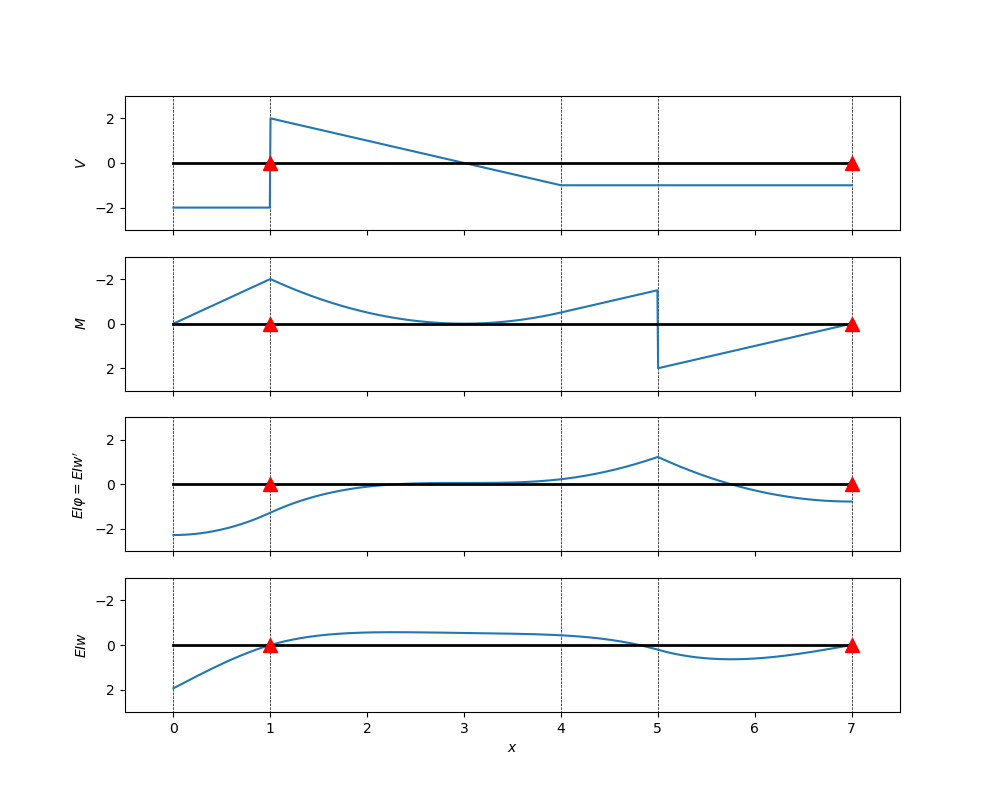

In [6]:
x = np.linspace(0, 7, 1000)
fix, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))
ax[0].plot(x, V(x))
ax[0].plot([0, 7], [0,0], 'k-', lw=2)
ax[0].plot([1,7], [0,0], 'r^', ms=10)
ax[0].set_ylabel('$V$')

ax[1].plot(x, M(x))
ax[1].plot([0, 7], [0,0], 'k-', lw=2)
ax[1].plot([1,7], [0,0], 'r^', ms=10)
ax[1].set_ylabel('$M$')

ax[2].plot(x, phi(x))
ax[2].plot([0, 7], [0,0], 'k-', lw=2)
ax[2].plot([1,7], [0,0], 'r^', ms=10)
ax[2].set_ylabel(r"$EI\varphi = EIw'$")

ax[3].plot(x, w(x))
ax[3].plot([0, 7], [0,0], 'k-', lw=2)
ax[3].plot([1,7], [0,0], 'r^', ms=10)
ax[3].set_ylabel('$EIw$')
ax[3].set_xlabel('$x$')

ymin = -3
ymax = 3
for a in ax:
    a.set_xlim(-.5, 7.5)
    a.set_ylim(ymin, ymax)
    a.plot([0]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([1]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([4]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([5]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([7]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)

ax[1].invert_yaxis()
ax[3].invert_yaxis()

In [7]:
E, I, x = sp.symbols('E I x')
c1 = - sp.Rational(109, 48)
c2 = sp.Rational(31, 16)
p1 = c2 + c1 * x + x**3 / 3
p2 = p1 - 2 * (x-1)**3 / 3 + (x-1)**4 / 24
p3 = p2 - (x-4)**4 / 24
p4 = p3 - 7 * (x-5)**2 /4
wx = sp.Piecewise((p1, (x>=0) & (x<1)),
                 (p2, x<4),
                 (p3, x<6),
                 (p4, x<=7)) / E / I
display(wx)
for i in range(8):
    display(sp.Eq(sp.S(f'w_{i}'), wx.subs(x, i)))#, w(float(i)))
    
phix = sp.diff(wx, x)
display(phix)
for i in range(8):
    display(sp.Eq(sp.S(f'phi_{i}'), phix.subs(x, i)))#.evalf()), phi(float(i)))

⎧                         3                                                        
⎪                        x    109⋅x   31                                           
⎪                        ── - ───── + ──                          for x ≥ 0 ∧ x < 1
⎪                        3      48    16                                           
⎪                                                                                  
⎪             3                  4            3                                    
⎪            x    109⋅x   (x - 1)    2⋅(x - 1)    31                               
⎪            ── - ───── + ──────── - ────────── + ──                  for x < 4    
⎪            3      48       24          3        16                               
⎨                                                                                  
⎪       3                  4          4            3                               
⎪      x    109⋅x   (x - 4)    (x - 1)    2⋅(x - 1)    31                   

⎧                     2   109                                        
⎪                    x  - ───                       for x ≥ 0 ∧ x < 1
⎪                          48                                        
⎪                                                                    
⎪                    3                                               
⎪         2   (x - 1)             2   109                            
⎪        x  + ──────── - 2⋅(x - 1)  - ───               for x < 4    
⎪                6                     48                            
⎪                                                                    
⎨               3          3                                         
⎪    2   (x - 4)    (x - 1)             2   109                      
⎪   x  - ──────── + ──────── - 2⋅(x - 1)  - ───         for x < 6    
⎪           6          6                     48                      
⎪                                                                    
⎪                  3

## Písemka 8a/8b

In [8]:
def V(x):
    p1 = lambda x: -10
    p2 = lambda x: p1(x) + 85/6
    p3 = lambda x: p2(x)
    return np.piecewise(x, [x>=0,
                           x>2,
                           x>5,],
                           [p1, p2, p3])

def M(x):
    p1 = lambda x: -10*x
    p2 = lambda x: p1(x) + 85/6*(x-2)
    p3 = lambda x: p2(x) - 5
    return np.piecewise(x, [x>=0,
                           x>2,
                           x>5,],
                           [p1, p2, p3])

def phi(x):
    c1 = - 352.5/6
    p1 = lambda x: c1 + 5*x**2
    p2 = lambda x: p1(x) -85/12*(x-2)**2
    p3 = lambda x: p2(x) + 5*(x-5)
    return np.piecewise(x, [x>=0,
                           x>2,
                           x>5,],
                           [p1, p2, p3])

def w(x):
    c1 = - 352.5/6
    c2 = 625/6
    p1 = lambda x: c2 + c1 * x + 5/3*x**3
    p2 = lambda x: p1(x) - 85/36*(x-2)**3
    p3 = lambda x: p2(x) + 5/2*(x-5)**2
    return np.piecewise(x, [x>=0,
                           x>2,
                           x>5,],
                           [p1, p2, p3])

<IPython.core.display.Javascript object>


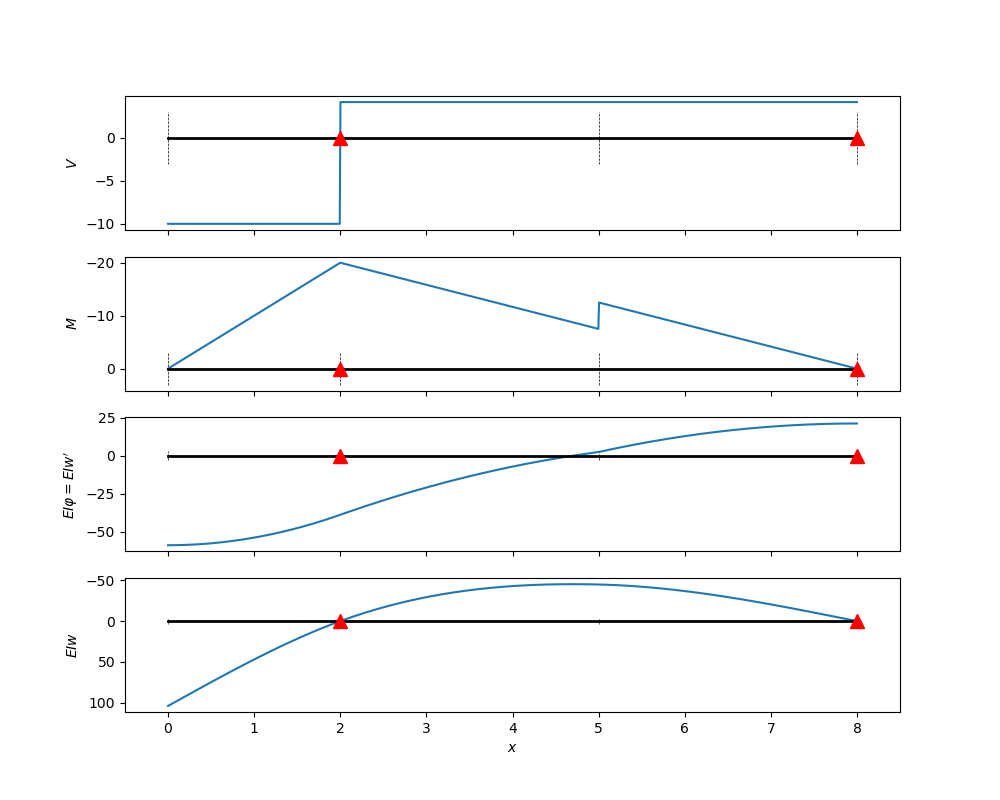

In [9]:
x = np.linspace(0, 8, 1000)
fix, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))
ax[0].plot(x, V(x))
ax[0].plot([0, 8], [0,0], 'k-', lw=2)
ax[0].plot([2,8], [0,0], 'r^', ms=10)
ax[0].set_ylabel('$V$')

ax[1].plot(x, M(x))
ax[1].plot([0, 8], [0,0], 'k-', lw=2)
ax[1].plot([2,8], [0,0], 'r^', ms=10)
ax[1].set_ylabel('$M$')

ax[2].plot(x, phi(x))
ax[2].plot([0, 8], [0,0], 'k-', lw=2)
ax[2].plot([2,8], [0,0], 'r^', ms=10)
ax[2].set_ylabel(r"$EI\varphi = EIw'$")

ax[3].plot(x, w(x))
ax[3].plot([0, 8], [0,0], 'k-', lw=2)
ax[3].plot([2,8], [0,0], 'r^', ms=10)
ax[3].set_ylabel('$EIw$')
ax[3].set_xlabel('$x$')

ymin = -3
ymax = 3
for a in ax:
    a.set_xlim(-.5, 8.5)
    #a.set_ylim(ymin, ymax)
    a.plot([0]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([2]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([5]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)
    a.plot([8]*2, [ymin, ymax], 'k--', lw=.5, zorder=-10)

ax[1].invert_yaxis()
ax[3].invert_yaxis()